**Employee Churn Prediciton Model**

In [62]:
#1 Importing Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#2 Uploading The Dataset To The Google Collaboration
from google.colab import files
uploaded=files

In [ ]:
#3 Displaying All The Columns In One Line
# pd.set_option('display.max_columns', None)  # Saare columns dikhein
# pd.set_option('display.width', 1000)        # Output ki width badha dein
pd.get_option('display.max_columns',None)
pd.get_option('display.width',1000)


1000

In [65]:
#4 Displaying The Data Set's First 5 Records
data=pd.read_csv('Churn_Modelling (2).csv')
print(data.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0          1    15634602  Hargrave          619    France  Female   42       2       0.00              1          1               1        101348.88       1
1          2    15647311      Hill          608     Spain  Female   41       1   83807.86              1          0               1        112542.58       0
2          3    15619304      Onio          502    France  Female   42       8  159660.80              3          1               0        113931.57       1
3          4    15701354      Boni          699    France  Female   39       1       0.00              2          0               0         93826.63       0
4          5    15737888  Mitchell          850     Spain  Female   43       2  125510.82              1          1               1         79084.10       0


In [ ]:
#5 Selecting Training and Testing Data
#As we can see that first 3 coumns are not use full in the trainging data set so we will neglect them
X=data.iloc[:,3:13]
y=data.iloc[:,13]

In [ ]:
#6Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
#7 Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [ ]:
#8 Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
#9 Spliting The Data Into Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=124)

In [ ]:

#10 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# ANN model initialize karen
classifier = Sequential()

# Input layer + pehli hidden layer (11 input, 6 neurons, relu activation)
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

# 2nd hidden layer (6 neurons, relu)
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

# Output layer (1 neuron, sigmoid for binary output)
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# Model compile karen
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

# Model train karen (epochs likhien, nb_epoch ki jagah)
model_history = classifier.fit(
    X_train, y_train,
    validation_split=0.33,
    batch_size=10,
    epochs=100   # 'epochs' use karen
)


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3614 - loss: 0.9186 - val_accuracy: 0.7512 - val_loss: 0.5727
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7808 - loss: 0.5469 - val_accuracy: 0.8016 - val_loss: 0.5012
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8156 - loss: 0.4831 - val_accuracy: 0.8084 - val_loss: 0.4763
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7982 - loss: 0.4854 - val_accuracy: 0.8099 - val_loss: 0.4609
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8138 - loss: 0.4554 - val_accuracy: 0.8122 - val_loss: 0.4502
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8190 - loss: 0.4380 - val_accuracy: 0.8137 - val_loss: 0.4418
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8048 - loss: 0.4546 - val_accuracy: 0.8145 - val_loss: 0.4342
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8231 - loss: 0.4209 - val_accuracy: 0.8201

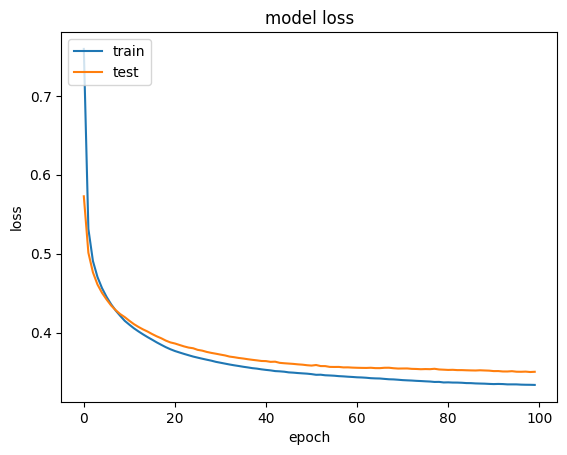

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [ ]:
print(cm)
print(score)

[[1521   87]
 [ 219  173]]
0.847
